In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
#tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler



import pickle

In [2]:

#http://10.79.85.55:8887/edit/data/MGP/TestPointsN2_CH4_H2O_000.xlsx
file_name = '/data/MGP/TestPointsN2_CH4_H2O_000.xlsx'
df=pd.read_excel(file_name,header=1).dropna(how='all', axis=1)
df.drop('#',axis=1,inplace=True)


In [3]:
phi_surge = 0.076 
df['surge_distance_from_eq'] = 100*(df['phi']-phi_surge)/phi_surge 

In [85]:
# func1 required columns
columns=['Pin [kPa]','Tin [K]','N [rpm]','Differential Pressure [kPa]','Total Consumed power','phi',
         'Surge Distance','surge_distance_from_eq','GVFin','Qin [m3/s]','GVFout','Qv_out [m3/s]']
inputs = ['Pin [kPa]','Tin [K]','N [rpm]','Differential Pressure [kPa]','Total Consumed power']
#outputs = ['GVFin','GVFout','Qin [m3/s]','Qv_out [m3/s]','phi','Surge Distance','surge_distance_from_eq']
outputs = ['GVFin','GVFout','Qin [m3/s]','Qv_out [m3/s]']
data=df[columns]
X=data[inputs]
y=data[outputs]

In [ ]:
# MAE is 0.57  for batch size 32 and epochs 250 
# columns=['Pin [kPa]','Tin [K]','N [rpm]','Differential Pressure [kPa]','Total Consumed power','GVFin','Qin [m3/s]','GVFout','Qv_out [m3/s]']
# inputs = ['Pin [kPa]','Tin [K]','N [rpm]','Differential Pressure [kPa]','Total Consumed power']
# outputs = ['GVFin','Qin [m3/s]','GVFout','Qv_out [m3/s]']
# outputs_x = ['GVFin','Qin [m3/s]','GVFout','Qv_out [m3/s]'],

In [86]:
#func2 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)


In [87]:
# func3
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def scale_datasets(x_train, x_test):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
    )
    x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
    )
    return x_train_scaled, x_test_scaled
# scale the dataset
X_train_scaled, X_test_scaled = scale_datasets(X_train, X_test)

## Train the model  

In [89]:
#import keras


from tensorflow import keras 
from keras import optimizers

checkpoint = keras.callbacks.ModelCheckpoint("mcp_x.h5", save_best_only=True)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer="l2", input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.05),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer="l2"),
    keras.layers.Dropout(0.05),
    keras.layers.BatchNormalization(),
    
  
    keras.layers.Dense(4)
])

model.compile(loss='mae',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-2, decay=0.1),
              metrics=['mae'])
              
history = model.fit(
    X_train_scaled, y_train,
    epochs=500,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint]
)

Epoch 1/500
632/632 [==============================] - 5s 6ms/step - loss: 11.8717 - mae: 11.8087 - val_loss: 9.2006 - val_mae: 9.1618
Epoch 2/500
632/632 [==============================] - 3s 5ms/step - loss: 7.4076 - mae: 7.3720 - val_loss: 6.0733 - val_mae: 6.0394
Epoch 3/500
632/632 [==============================] - 3s 5ms/step - loss: 5.3659 - mae: 5.3327 - val_loss: 4.3725 - val_mae: 4.3397
Epoch 4/500
632/632 [==============================] - 4s 6ms/step - loss: 4.0296 - mae: 3.9971 - val_loss: 3.1333 - val_mae: 3.1009
Epoch 5/500
632/632 [==============================] - 3s 5ms/step - loss: 3.1723 - mae: 3.1400 - val_loss: 2.4187 - val_mae: 2.3864
Epoch 6/500
632/632 [==============================] - 3s 5ms/step - loss: 2.6042 - mae: 2.5720 - val_loss: 1.7099 - val_mae: 1.6777
Epoch 7/500
632/632 [==============================] - 3s 5ms/step - loss: 2.2472 - mae: 2.2150 - val_loss: 1.4812 - val_mae: 1.4491
Epoch 8/500
632/632 [==============================] - 4s 6ms/step 

632/632 [==============================] - 4s 6ms/step - loss: 1.5319 - mae: 1.5021 - val_loss: 0.6625 - val_mae: 0.6327
Epoch 124/500
632/632 [==============================] - 3s 5ms/step - loss: 1.6300 - mae: 1.6002 - val_loss: 0.6636 - val_mae: 0.6339
Epoch 125/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5628 - mae: 1.5331 - val_loss: 0.6627 - val_mae: 0.6330
Epoch 126/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5919 - mae: 1.5622 - val_loss: 0.6638 - val_mae: 0.6341
Epoch 127/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5910 - mae: 1.5612 - val_loss: 0.6631 - val_mae: 0.6334
Epoch 128/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5896 - mae: 1.5598 - val_loss: 0.6641 - val_mae: 0.6344
Epoch 129/500
632/632 [==============================] - 3s 5ms/step - loss: 1.6106 - mae: 1.5809 - val_loss: 0.6738 - val_mae: 0.6441
Epoch 130/500
632/632 [==============================] - 3s 5ms/step 

Epoch 184/500
632/632 [==============================] - 4s 6ms/step - loss: 1.6038 - mae: 1.5744 - val_loss: 0.6393 - val_mae: 0.6099
Epoch 185/500
632/632 [==============================] - 4s 6ms/step - loss: 1.5780 - mae: 1.5486 - val_loss: 0.6393 - val_mae: 0.6099
Epoch 186/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5952 - mae: 1.5658 - val_loss: 0.6434 - val_mae: 0.6140
Epoch 187/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5924 - mae: 1.5630 - val_loss: 0.6535 - val_mae: 0.6241
Epoch 188/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5916 - mae: 1.5623 - val_loss: 0.6615 - val_mae: 0.6321
Epoch 189/500
632/632 [==============================] - 4s 6ms/step - loss: 1.5679 - mae: 1.5386 - val_loss: 0.6529 - val_mae: 0.6235
Epoch 190/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5850 - mae: 1.5556 - val_loss: 0.6415 - val_mae: 0.6121
Epoch 191/500
632/632 [==============================] 

Epoch 305/500
632/632 [==============================] - 4s 6ms/step - loss: 1.5315 - mae: 1.5026 - val_loss: 0.6179 - val_mae: 0.5889
Epoch 306/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5278 - mae: 1.4989 - val_loss: 0.6207 - val_mae: 0.5918
Epoch 307/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5683 - mae: 1.5394 - val_loss: 0.6216 - val_mae: 0.5926
Epoch 308/500
632/632 [==============================] - 3s 5ms/step - loss: 1.4859 - mae: 1.4570 - val_loss: 0.6216 - val_mae: 0.5927
Epoch 309/500
632/632 [==============================] - 3s 5ms/step - loss: 1.5278 - mae: 1.4989 - val_loss: 0.6234 - val_mae: 0.5945
Epoch 310/500
632/632 [==============================] - 4s 6ms/step - loss: 1.5125 - mae: 1.4836 - val_loss: 0.6286 - val_mae: 0.5997
Epoch 311/500
632/632 [==============================] - 3s 6ms/step - loss: 1.5255 - mae: 1.4966 - val_loss: 0.6259 - val_mae: 0.5970
Epoch 312/500
632/632 [==============================] 

Epoch 426/500
632/632 [==============================] - 3s 4ms/step - loss: 1.5404 - mae: 1.5118 - val_loss: 0.6073 - val_mae: 0.5787
Epoch 427/500
632/632 [==============================] - 3s 4ms/step - loss: 1.5417 - mae: 1.5131 - val_loss: 0.6138 - val_mae: 0.5852
Epoch 428/500
632/632 [==============================] - 3s 4ms/step - loss: 1.5383 - mae: 1.5097 - val_loss: 0.6120 - val_mae: 0.5834
Epoch 429/500
632/632 [==============================] - 3s 4ms/step - loss: 1.5292 - mae: 1.5006 - val_loss: 0.6187 - val_mae: 0.5901
Epoch 430/500
632/632 [==============================] - 3s 4ms/step - loss: 1.4977 - mae: 1.4691 - val_loss: 0.6098 - val_mae: 0.5812
Epoch 431/500
632/632 [==============================] - 3s 4ms/step - loss: 1.5494 - mae: 1.5208 - val_loss: 0.6088 - val_mae: 0.5802
Epoch 432/500
632/632 [==============================] - 3s 4ms/step - loss: 1.5394 - mae: 1.5108 - val_loss: 0.6225 - val_mae: 0.5939
Epoch 433/500
632/632 [==============================] 

In [ ]:
# for 4 outputs
# decreasing batch size to 32 and increasing epochs to 400 give more error takes more time to reach the same mae of
# 213 0.73
# compared to batch size 64 at epoch 53 val_mae is 0.65, minimum is 0.58

# for extended outputs same config above
# mae is 

## load the saved model and predict for unseen data

In [103]:
test_data = y_test[outputs]
# the saved model is loaded to make predictions on the new data(X_test)
model_loaded = tf.keras.models.load_model('mcp_x.h5')

# predictions from the saved model
pred_test_loaded = model_loaded.predict(X_test_scaled)

print("RMSE Test_x",np.sqrt(mean_squared_error(test_data,pred_test_loaded))) # optional get the error from the predictions
print("R2 score Test_x",r2_score(test_data,pred_test_loaded))

RMSE Test_x 1.1569012743398102
R2 score Test_x 0.9174930593095278


In [109]:
for i, out in enumerate(outputs):
    test_data[out+'_pred'] = pred_test_loaded[:,i]
for i, out in enumerate(outputs):
    test_data[out+'_residuals'] = test_data[out] - test_data[out+'_pred']

In [112]:
df_metrics=pd.DataFrame(columns=['Variable','RMSE','R²'])
A=[];B=[];C=[]
for i, out in enumerate(outputs):
    A.append(out)
    B.append(round(math.sqrt(mean_squared_error(test_data[out],test_data[out+'_pred'])),4))
    C.append(round(r2_score(test_data[out],test_data[out+'_pred']),4))
# phi, surge distance, Surge_distance_eq are from the predictions
df_metrics['Variable']=A
df_metrics['RMSE']=B
df_metrics['R²']=C

In [113]:

df_metrics

,Variable,RMSE,R²
0,GVFin,1.6690,0.9940
1,GVFout,1.6024,0.9944
2,Qin [m3/s],0.0137,0.8323
3,Qv_out [m3/s],0.0122,0.8493


In [114]:
X_test['N [rpm]'].head()

6188     2129.434401
40868    4961.807221
36553    4020.370134
57857    2215.594019
54851    5089.035481
Name: N [rpm], dtype: float64

In [115]:
test_data['N [rpm]']=X_test['N [rpm]']

In [116]:
# calculate phi from Qin_predicted and calculate Surge distance 
test_data['phi_calculated']=test_data['Qin [m3/s]_pred']/(test_data['N [rpm]']/60*2*math.pi*0.15*0.01885)

In [67]:
# const=2*math.pi*0.15*0.01885  #(data_1['phi'] - 0.076)/0.076)*100
# const

0.01776570645605028

In [69]:
##phi_calculated_1=test_data['Qin [m3/s]_pred']/test_data['N [rpm]']/60*const

In [70]:
#phi_calculated_1[0:4] #wrong calculation

6188     6.902936e-09
40868    8.369838e-09
36553    9.821717e-09
57857    8.342391e-09
dtype: float64

In [117]:
phi_calculated[0:4]

6188     0.078736
40868    0.095467
36553    0.112028
57857    0.095154
dtype: float64

In [120]:
Phi_Surge = 0.076
test_data['Surge Distance_from_phi_qin'] = 100*(test_data['phi_calculated']-Phi_Surge)/Phi_Surge 

In [129]:
test_data.columns


Index(['GVFin', 'GVFout', 'Qin [m3/s]', 'Qv_out [m3/s]', 'GVFin_pred',
       'GVFout_pred', 'Qin [m3/s]_pred', 'Qv_out [m3/s]_pred',
       'GVFin_residuals', 'GVFout_residuals', 'Qin [m3/s]_residuals',
       'Qv_out [m3/s]_residuals', 'N [rpm]', 'phi_calculated',
       'Surge Distance_from_phi_qin', 'Surge Distance',
       'surge_distance_from_eq'],
      dtype='object')

In [123]:
dt=df.iloc[X_test.index]
test_data[['Surge Distance','surge_distance_from_eq']] = dt[['Surge Distance','surge_distance_from_eq']]

In [ ]:
output_x

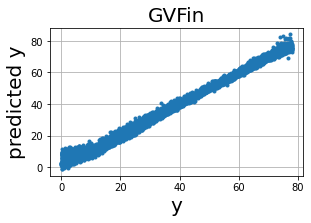

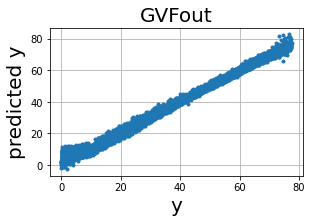

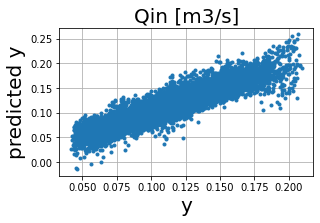

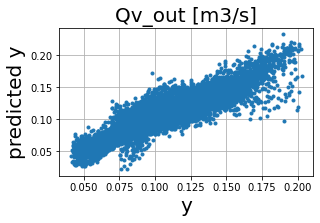

In [132]:
import matplotlib.pyplot as plt
for ii,output in enumerate(outputs):

#     x, pred, y = range(len(predictions_1))[:], test_y[output][:], predictions_1[:,ii][:]
    x,y,pred = range(len(test_data)), test_data[output], test_data[output+'_pred']
    residual = pred - y

    plt.figure(figsize=(10,6))    
    plt.subplot(221)

    plt.plot(y, pred, '.') #color='b', marker='o', label='test')
    plt.title(output, fontsize=20)
    plt.ylabel('predicted y', fontsize=20)
    plt.xlabel('y', fontsize=20)
    #plt.legend(fontsize=20)
    plt.grid(True)

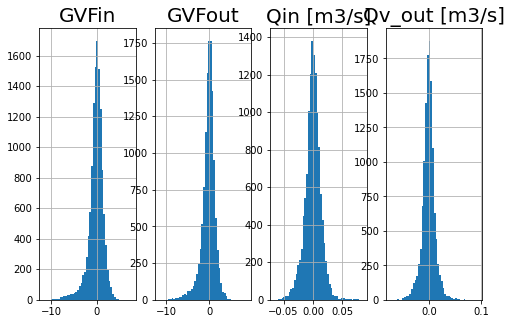

In [133]:
plt.figure(figsize=(10,5)) 
for ii,output in enumerate(outputs):

    residual = test_data[output+'_residuals'] #pred - y
   
    plt.subplot(1,5,ii+1)

    plt.hist(residual,bins=50)
    plt.title(output, fontsize=20)
#     plt.ylabel(output, fontsize=20)
#     plt.xlabel('# of Input', fontsize=20)
    plt.grid(True)

In [139]:
# print('RMSE SURGE DISTANCE',round(math.sqrt(mean_squared_error(test_data['Surge Distance'],test_data['Surge Distance_from_phi_qin'])),4))
# print('R2 Score_sd_eq',round(r2_score(test_data['Surge Distance'],test_data['Surge Distance_from_phi_qin'])),4)
#30+    
print('RMSE SURGE DISTANCE_eq',math.sqrt(mean_squared_error(test_data['Surge Distance_from_phi_qin'],test_data['surge_distance_from_eq'])))
print('R2 Score_sd_eq',r2_score(test_data['Surge Distance_from_phi_qin'],test_data['surge_distance_from_eq']))


RMSE SURGE DISTANCE_eq 17.76115922522345
R2 Score_sd_eq 0.5748641392840661


In [141]:
test_data['N [rpm]'].head()

6188     2129.434401
40868    4961.807221
36553    4020.370134
57857    2215.594019
54851    5089.035481
Name: N [rpm], dtype: float64

In [ ]:
## only surge_distance from eq as output

In [142]:
columns=['Pin [kPa]','Tin [K]','N [rpm]','Differential Pressure [kPa]','Total Consumed power','phi',
         'Surge Distance','surge_distance_from_eq','GVFin','Qin [m3/s]','GVFout','Qv_out [m3/s]']
inputs = ['Pin [kPa]','Tin [K]','N [rpm]','Differential Pressure [kPa]','Total Consumed power']
#outputs = ['GVFin','GVFout','Qin [m3/s]','Qv_out [m3/s]','phi','Surge Distance','surge_distance_from_eq']
outputs = ['surge_distance_from_eq']
data=df[columns]
X=data[inputs]
y=data[outputs]

In [143]:
#func2 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)


In [144]:
# func3
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def scale_datasets(x_train, x_test):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
    )
    x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
    )
    return x_train_scaled, x_test_scaled
# scale the dataset
X_train_scaled, X_test_scaled = scale_datasets(X_train, X_test)

In [155]:
#import keras


from tensorflow import keras 
from keras import optimizers

checkpoint = keras.callbacks.ModelCheckpoint("mcp_x.h5", save_best_only=True)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', kernel_initializer='normal', kernel_regularizer="l2", input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.05),
    keras.layers.BatchNormalization(),
    
    keras.layers.Dense(64, activation='relu', kernel_initializer='normal', kernel_regularizer="l2"),
    keras.layers.Dropout(0.05),
    keras.layers.BatchNormalization(),
    
  
    keras.layers.Dense(1)
])

model.compile(loss='mae',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-2, decay=0.1),
              metrics=['mae'])
              
history = model.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=64,
    validation_split=0.2,
    callbacks=[checkpoint]
)

Epoch 1/150
632/632 [==============================] - 5s 5ms/step - loss: 17.2351 - mae: 17.0717 - val_loss: 10.7415 - val_mae: 10.5943
Epoch 2/150
632/632 [==============================] - 3s 5ms/step - loss: 9.7818 - mae: 9.6367 - val_loss: 6.9921 - val_mae: 6.8481
Epoch 3/150
632/632 [==============================] - 3s 5ms/step - loss: 7.2590 - mae: 7.1157 - val_loss: 5.2200 - val_mae: 5.0772
Epoch 4/150
632/632 [==============================] - 3s 5ms/step - loss: 6.2835 - mae: 6.1409 - val_loss: 4.5081 - val_mae: 4.3657
Epoch 5/150
632/632 [==============================] - 3s 5ms/step - loss: 5.8301 - mae: 5.6879 - val_loss: 3.9954 - val_mae: 3.8534
Epoch 6/150
632/632 [==============================] - 3s 5ms/step - loss: 5.5393 - mae: 5.3975 - val_loss: 3.8252 - val_mae: 3.6835
Epoch 7/150
632/632 [==============================] - 3s 5ms/step - loss: 5.3353 - mae: 5.1937 - val_loss: 3.6757 - val_mae: 3.5342
Epoch 8/150
632/632 [==============================] - 3s 5ms/ste

632/632 [==============================] - 3s 5ms/step - loss: 4.4412 - mae: 4.3044 - val_loss: 2.6978 - val_mae: 2.5610
Epoch 124/150
632/632 [==============================] - 3s 5ms/step - loss: 4.4206 - mae: 4.2838 - val_loss: 2.6935 - val_mae: 2.5567
Epoch 125/150
632/632 [==============================] - 3s 5ms/step - loss: 4.4402 - mae: 4.3034 - val_loss: 2.6879 - val_mae: 2.5511
Epoch 126/150
632/632 [==============================] - 3s 5ms/step - loss: 4.4058 - mae: 4.2690 - val_loss: 2.6948 - val_mae: 2.5580
Epoch 127/150
632/632 [==============================] - 3s 5ms/step - loss: 4.4655 - mae: 4.3287 - val_loss: 2.6939 - val_mae: 2.5571
Epoch 128/150
632/632 [==============================] - 3s 5ms/step - loss: 4.4835 - mae: 4.3467 - val_loss: 2.6853 - val_mae: 2.5486
Epoch 129/150
632/632 [==============================] - 3s 5ms/step - loss: 4.4187 - mae: 4.2820 - val_loss: 2.6901 - val_mae: 2.5533
Epoch 130/150
632/632 [==============================] - 3s 5ms/step 

In [160]:
pred_test_loaded1[0]

array([10.081938], dtype=float32)

In [158]:
test_data1 = y_test[outputs]
model_loaded1 = tf.keras.models.load_model('mcp_x.h5')

# predictions from the saved model
pred_test_loaded1 = model_loaded1.predict(X_test_scaled)

print("RMSE Test_x",np.sqrt(mean_squared_error(test_data1,pred_test_loaded1))) # optional get the error from the predictions
print("R2 score Test_x",r2_score(test_data1,pred_test_loaded1))

RMSE Test_x 3.728578713378082
R2 score Test_x 0.972337609255163


In [162]:
test_data1 = y_test[outputs]
# the saved model is loaded to make predictions on the new data(X_test)
model_loaded1 = tf.keras.models.load_model('mcp_x.h5')

# predictions from the saved model
pred_test_loaded1 = model_loaded1.predict(X_test_scaled)

print("RMSE Test_x",np.sqrt(mean_squared_error(test_data1,pred_test_loaded1))) # optional get the error from the predictions
print("R2 score Test_x",r2_score(test_data1,pred_test_loaded1))

for i, out in enumerate(outputs):
    test_data1[out+'_pred'] = pred_test_loaded1[:,i]
for i, out in enumerate(outputs):
    test_data1[out+'_residuals'] = test_data1[out] - test_data1[out+'_pred']

df_metrics1=pd.DataFrame(columns=['Variable','RMSE','R²'])
A=[];B=[];C=[]
for i, out in enumerate(outputs):
    A.append(out)
    B.append(round(math.sqrt(mean_squared_error(test_data1[out],test_data1[out+'_pred'])),4))
    C.append(round(r2_score(test_data1[out],test_data1[out+'_pred']),4))
# phi, surge distance, Surge_distance_eq are from the predictions
df_metrics1['Variable']=A
df_metrics1['RMSE']=B
df_metrics1['R²']=C

RMSE Test_x 3.728578713378082
R2 score Test_x 0.972337609255163


In [163]:
df_metrics1

,Variable,RMSE,R²
0,surge_distance_from_eq,3.7286,0.9723
